In [1]:
import pandas as pd
df = pd.read_csv("c:/data/pima/data.csv")

In [2]:
X=df[df.columns[0:-1]]
y=df['outcome']

In [3]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)

In [4]:
from sklearn.tree import DecisionTreeClassifier
model1 = DecisionTreeClassifier(random_state=0)
model1.fit(X_train, y_train)
print(model1.score(X_train,y_train))
print(model1.score(X_test,y_test))
# 과적합

1.0
0.71875


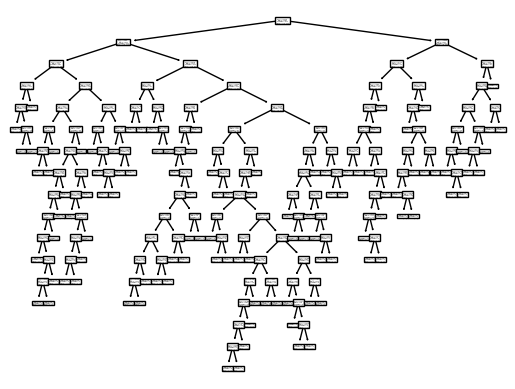

In [5]:
import matplotlib.pyplot as plt
from sklearn import tree
tree.plot_tree(model1)
plt.show()

0.7482638888888888
0.75


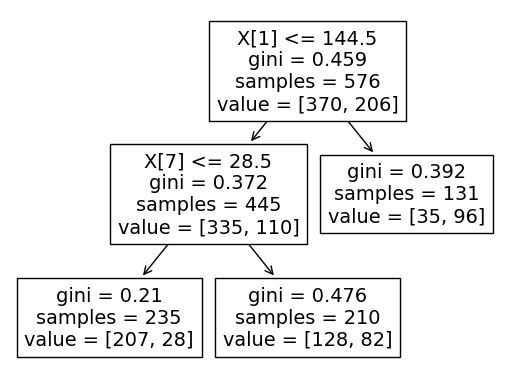

In [11]:
#max_leaf_nodes : leaf node(자식 노드가 없는 노드)의 최대 개수
#min_samples_leaf : leaf node가 되기 위한 최소한의 샘플 개수
#min_samples_split : 노드가 분기할 수 있는 최소 샘플 개수
model2 = DecisionTreeClassifier(max_leaf_nodes=3, random_state=0)
model2.fit(X_train, y_train)
print(model2.score(X_train,y_train))
print(model2.score(X_test,y_test))
tree.plot_tree(model2)
plt.show()

0.7916666666666666
0.765625


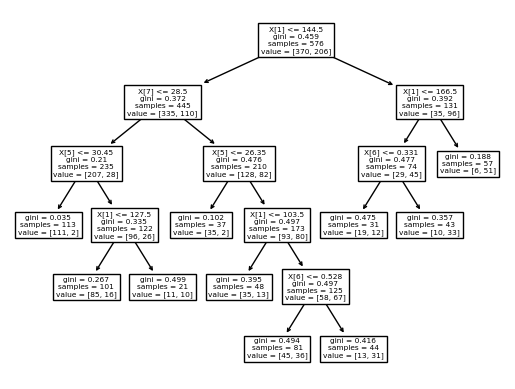

In [7]:
model3 = DecisionTreeClassifier(max_leaf_nodes=10, random_state=0)
model3.fit(X_train, y_train)
print(model3.score(X_train,y_train))
print(model3.score(X_test,y_test))
tree.plot_tree(model3)
plt.show()

In [8]:
from sklearn.tree import export_text
#의사결정나무 모형에서 도출한 규칙들을 텍스트로 출력
tree_rules = export_text(model2, feature_names=list(X_train.columns))
print(tree_rules)

|--- glucose <= 144.50
|   |--- age <= 28.50
|   |   |--- class: 0
|   |--- age >  28.50
|   |   |--- class: 0
|--- glucose >  144.50
|   |--- class: 1



In [9]:
# tree_ : 트리의 루트 노드
n_nodes = model2.tree_.node_count
print('전체 노드 개수:',n_nodes)
threshold = model2.tree_.threshold
print('노드의 임계값:',threshold)

전체 노드 개수: 5
노드의 임계값: [144.5  28.5  -2.   -2.   -2. ]
